<a href="https://colab.research.google.com/github/jdhruv1503/summer-of-code-2023/blob/main/machine-learning/week1/PricePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset selection

The dataset I have selected is a Laptop Price dataset from Kaggle for now: https://www.kaggle.com/datasets/muhammetvarl/laptop-price

To begin with, let's import the data and everything else we need:

In [ ]:
import numpy as np                                    # For matrices!
import matplotlib.pyplot as plt                       # To visualize
import pandas as pd                                   # To read data
from sklearn.linear_model import LinearRegression     # For the regression itself
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.preprocessing import OneHotEncoder       # To convert discrete strings to vectors!
from sklearn.preprocessing import normalize           # For normalizing
from google.colab import files                        # To upload dataset
import seaborn as sns                                 # For plots
import joblib

In [ ]:
uploaded = files.upload()   # Upload laptop_price.csv here

Saving laptop_price.csv to laptop_price.csv


In [ ]:
raw_data = pd.read_csv('laptop_price.csv', encoding='latin-1')
raw_data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Exploratory data analysis!!


Let's plot the price, and then the average price grouped by feature:


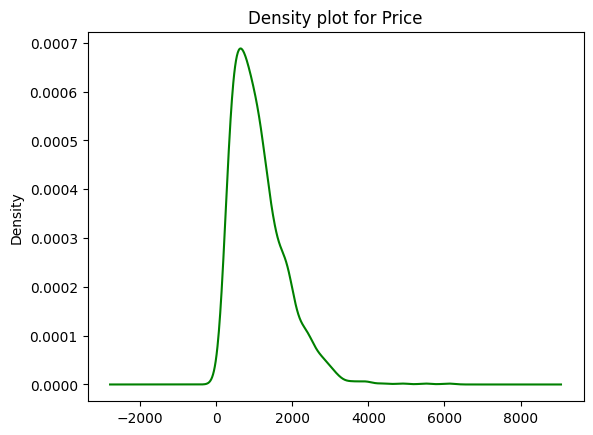

In [ ]:
raw_data.Price_euros.plot.density(color='green')
plt.title('Density plot for Price')
plt.show()

# Univariate analysis

## Price wrt Company

Clearly, company plays a massive role in price.

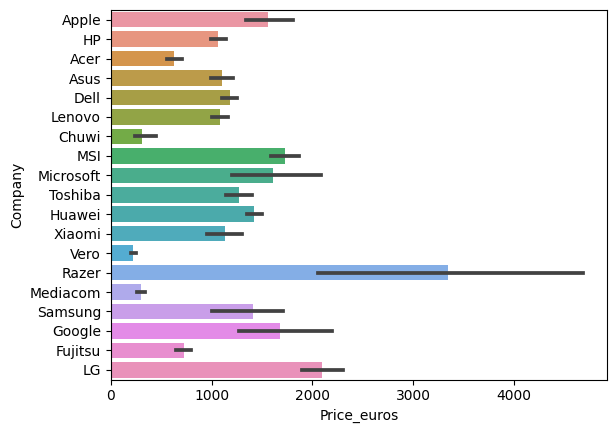

In [ ]:
p1 = sns.barplot(y='Company', x='Price_euros', data=raw_data, orient='h')

## Price wrt Other Stats



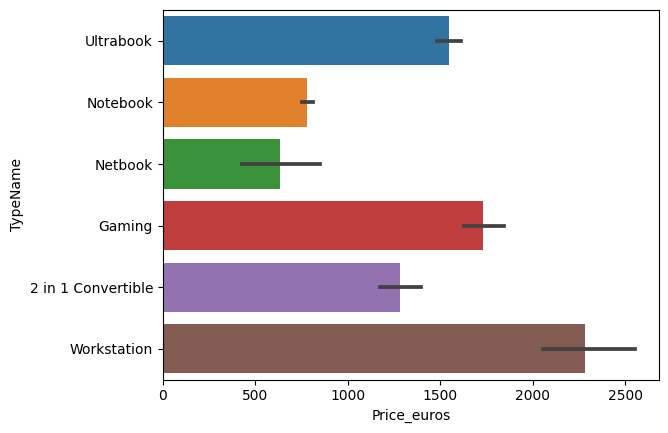

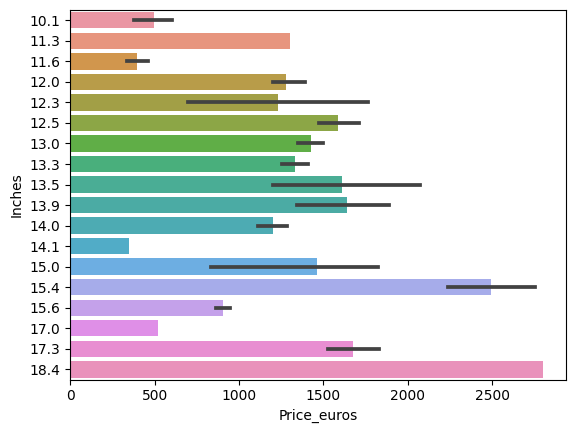

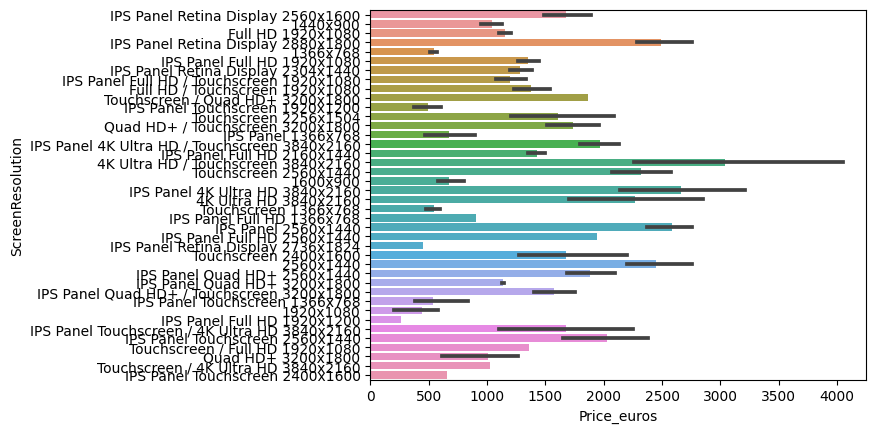

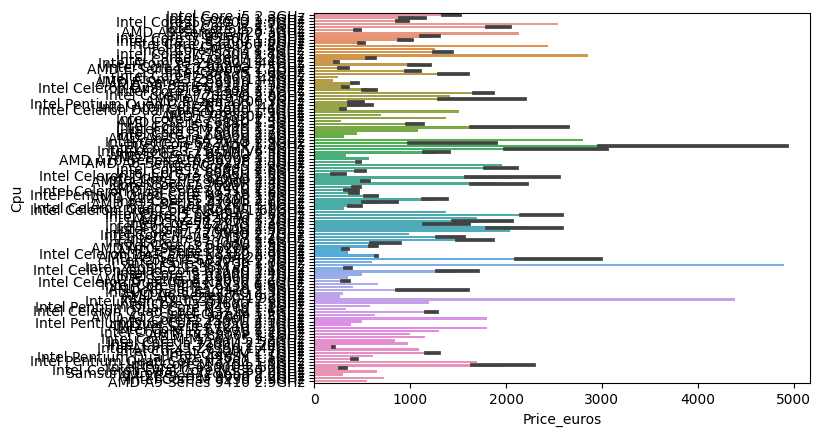

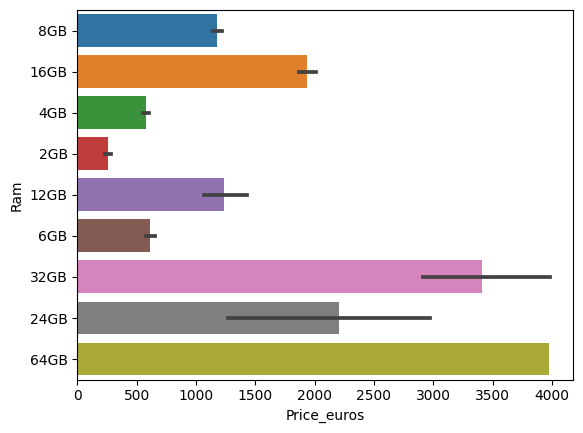

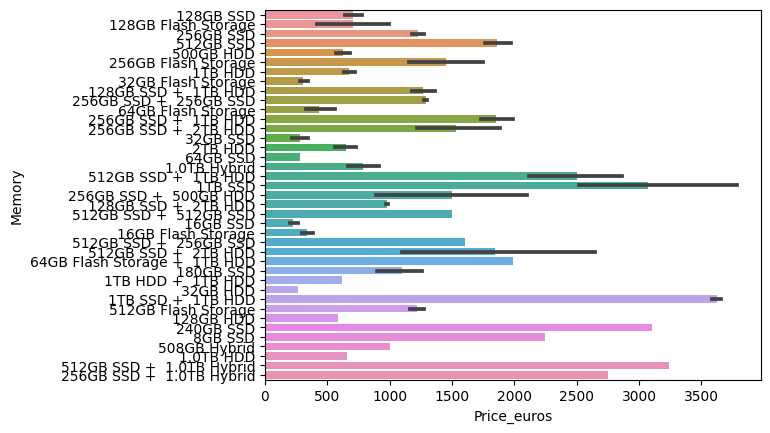

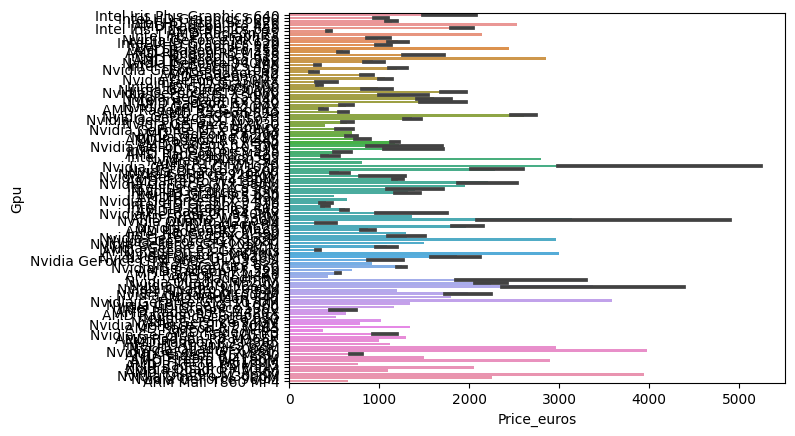

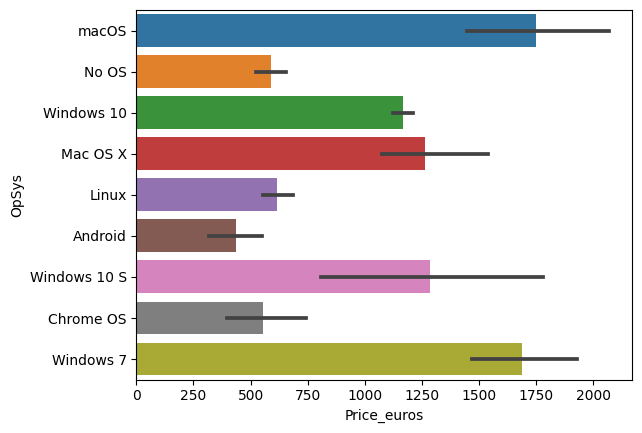

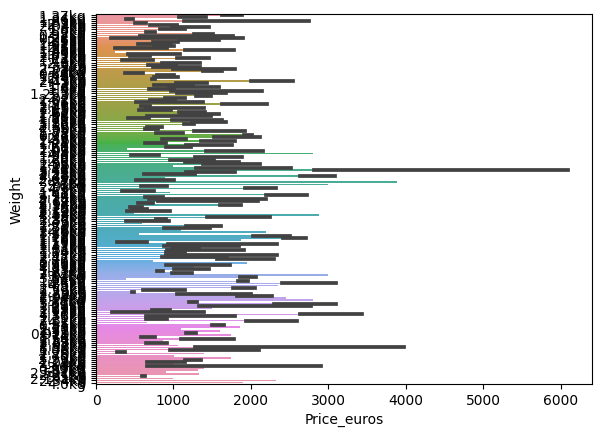

In [ ]:
p3 = sns.barplot(y='TypeName', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p4 = sns.barplot(y='Inches', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p5 = sns.barplot(y='ScreenResolution', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p6 = sns.barplot(y='Cpu', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p7 = sns.barplot(y='Ram', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p8 = sns.barplot(y='Memory', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p9 = sns.barplot(y='Gpu', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p10 = sns.barplot(y='OpSys', x='Price_euros', data=raw_data, orient='h')
plt.show()
print()
p11 = sns.barplot(y='Weight', x='Price_euros', data=raw_data, orient='h')
plt.show()

# Some conclusions from the data





*   Company plays a massive role. We can do one-hot encoding here.
*   TypeName - same, use one-hot encoding
*   Size in inches is irrelevant to price. We drop it.
*   We can extract resolution, whether it's IPS or not, whether it's Touchscreen or not from ScreenResolution (Feature Engineering)
*   We can extract CPU brand, GHz, Core count (Feature Engineering)
*   GPU brand can be extracted
*   OS makes a difference to price. One-hot encoding.
*   There isn't a correlation between weight and price. We drop it.





# Feature Engineering: Let's add these features to our dataset!

After adding numbers to see if screen is IPS or touchscreen, no correlation was found, so I didn't end up including them.

In [ ]:
# Now feature eng

Resolution = []
for row in raw_data['ScreenResolution']:
  Resolution.append(int(((row.split(" ")[-1]).split("x"))[0]) * int(((row.split(" ")[-1]).split("x"))[1]))

raw_data['Resolution'] = Resolution



GHz, CpuBrand = [], []
for row in raw_data['Cpu']:

  CpuBrand.append(row.split()[0])
  GHz.append(float(row.split()[-1][:-3]))

raw_data['GHz'] = GHz
raw_data['CpuBrand'] = CpuBrand



GpuBrand = []
for row in raw_data['Gpu']:

  if "Intel HD" in row:
    GpuBrand.append("Intel HD")
  elif "Intel Iris" in row:
    GpuBrand.append("Intel Iris")
  elif "Nvidia" in row:
    GpuBrand.append("Nvidia")
  elif "AMD" in row:
    GpuBrand.append("AMD")
  else:
    GpuBrand.append("None")

raw_data['GpuBrand'] = GpuBrand



RamValue = []
for row in raw_data['Ram']:
  RamValue.append(int(row[:-2]))

raw_data['RamValue'] = RamValue

StorageisSSD = []
for row in raw_data['Memory']:

  if "SSD" in row or "Hybrid" in row:
    StorageisSSD.append(1)
  else:
    StorageisSSD.append(0)

raw_data['StorageisSSD'] = StorageisSSD



raw_data = raw_data.drop(columns=['Product', 'Weight','Inches', 'ScreenResolution', 'Cpu', 'Gpu', 'Ram', 'Memory'])
print(raw_data)

      laptop_ID Company            TypeName       OpSys  Price_euros  \
0             1   Apple           Ultrabook       macOS      1339.69   
1             2   Apple           Ultrabook       macOS       898.94   
2             3      HP            Notebook       No OS       575.00   
3             4   Apple           Ultrabook       macOS      2537.45   
4             5   Apple           Ultrabook       macOS      1803.60   
...         ...     ...                 ...         ...          ...   
1298       1316  Lenovo  2 in 1 Convertible  Windows 10       638.00   
1299       1317  Lenovo  2 in 1 Convertible  Windows 10      1499.00   
1300       1318  Lenovo            Notebook  Windows 10       229.00   
1301       1319      HP            Notebook  Windows 10       764.00   
1302       1320    Asus            Notebook  Windows 10       369.00   

      Resolution  GHz CpuBrand    GpuBrand  RamValue  StorageisSSD  
0        4096000  2.3    Intel  Intel Iris         8             1

# Analysis of our new features

Success! There's somewhat of a linear correlation in the new features!

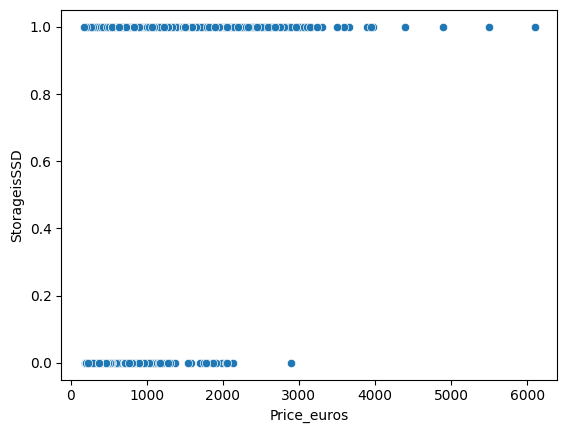

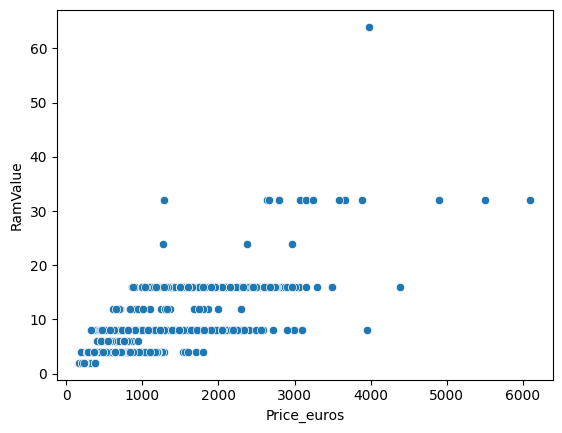

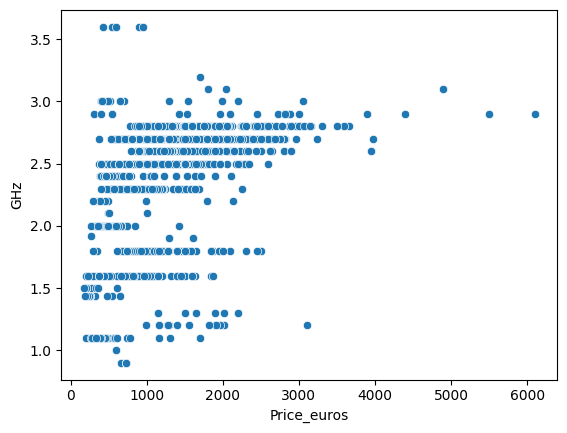

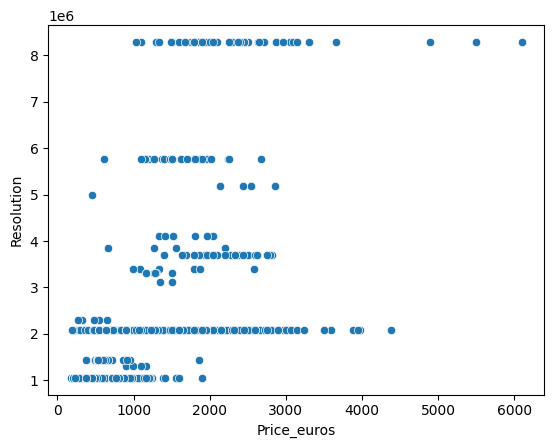

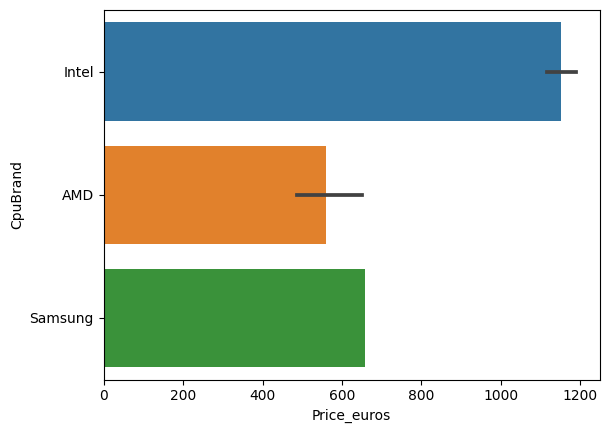

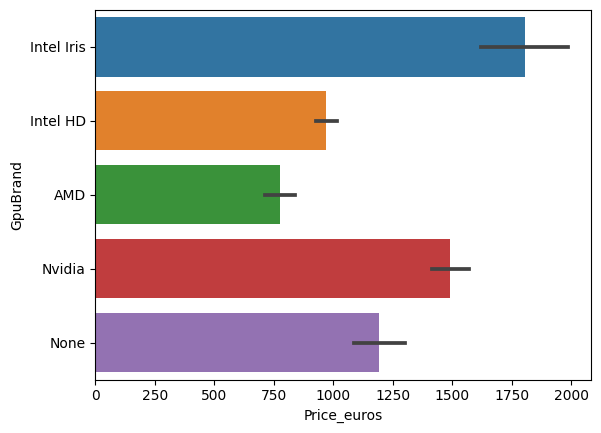

In [ ]:
p = sns.scatterplot(y='StorageisSSD', x='Price_euros', data=raw_data)
plt.show()
print()
p = sns.scatterplot(y='RamValue', x='Price_euros', data=raw_data)
plt.show()
print()
p = sns.scatterplot(y='GHz', x='Price_euros', data=raw_data)
plt.show()
print()
p = sns.scatterplot(y='Resolution', x='Price_euros', data=raw_data)
plt.show()
print()
p = sns.barplot(y='CpuBrand', x='Price_euros', data=raw_data, orient="h")
plt.show()
print()
p = sns.barplot(y='GpuBrand', x='Price_euros', data=raw_data, orient="h")
plt.show()
print()


# One-Hot encoding: Turn the brands to numbers (Min-max normalization too)


In [ ]:
# First we convert to numpy arrays

y = np.array(raw_data['Price_euros'])
X_num = np.array(raw_data[['Resolution', 'GHz', 'RamValue', 'StorageisSSD']])
X_nonnum = np.array(raw_data[['CpuBrand', 'GpuBrand', 'Company', 'TypeName', 'OpSys']])

print(X_num)
print(X_nonnum)

[[4.096000e+06 2.300000e+00 8.000000e+00 1.000000e+00]
 [1.296000e+06 1.800000e+00 8.000000e+00 0.000000e+00]
 [2.073600e+06 2.500000e+00 8.000000e+00 1.000000e+00]
 ...
 [1.049088e+06 1.600000e+00 2.000000e+00 0.000000e+00]
 [1.049088e+06 2.500000e+00 6.000000e+00 0.000000e+00]
 [1.049088e+06 1.600000e+00 4.000000e+00 0.000000e+00]]
[['Intel' 'Intel Iris' 'Apple' 'Ultrabook' 'macOS']
 ['Intel' 'Intel HD' 'Apple' 'Ultrabook' 'macOS']
 ['Intel' 'Intel HD' 'HP' 'Notebook' 'No OS']
 ...
 ['Intel' 'Intel HD' 'Lenovo' 'Notebook' 'Windows 10']
 ['Intel' 'AMD' 'HP' 'Notebook' 'Windows 10']
 ['Intel' 'Intel HD' 'Asus' 'Notebook' 'Windows 10']]


In [ ]:
# Normalize between 0 to 1 in the first array

X_norm = normalize(X_num, norm="max", axis = 0)
print(X_norm)
print(X_norm.shape)

[[0.49382716 0.63888889 0.125      1.        ]
 [0.15625    0.5        0.125      0.        ]
 [0.25       0.69444444 0.125      1.        ]
 ...
 [0.12648148 0.44444444 0.03125    0.        ]
 [0.12648148 0.69444444 0.09375    0.        ]
 [0.12648148 0.44444444 0.0625     0.        ]]
(1303, 4)


In [ ]:
# One-hot encode the second array

enc = OneHotEncoder(sparse_output=False)
X_transform = enc.fit_transform(X_nonnum)
print(X_transform)
print(X_transform.shape)

[[0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(1303, 42)


In [ ]:
X = np.concatenate((X_norm, X_transform), axis=1)

print(X)
print(X.shape)

[[0.49382716 0.63888889 0.125      ... 0.         0.         1.        ]
 [0.15625    0.5        0.125      ... 0.         0.         1.        ]
 [0.25       0.69444444 0.125      ... 0.         0.         0.        ]
 ...
 [0.12648148 0.44444444 0.03125    ... 0.         0.         0.        ]
 [0.12648148 0.69444444 0.09375    ... 0.         0.         0.        ]
 [0.12648148 0.44444444 0.0625     ... 0.         0.         0.        ]]
(1303, 46)


# Let's try some models!

Model training and evaluation using MSE and RMSE!

In [ ]:
# Split into train and test data (75-25 split)

X_test, X_train = np.split(X, [X.shape[0]//4])
y_test, y_train = np.split(y, [y.shape[0]//4])


# Trying out a bunch of models!

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression Score: ", model.score(X_test, y_test))
print("Linear Regression MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("Linear Regression RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

model = svm.SVR()
model.fit(X_train, y_train)
print("SVM Score: ", model.score(X_test, y_test))
print("SVM MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("SVM RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

model = Ridge(alpha=0.001)
model.fit(X_train, y_train)
print("Ridge Regression Score: ", model.score(X_test, y_test))
print("Ridge Regression MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("Ridge Regression RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

model = SGDRegressor(fit_intercept=False, alpha = 0.00001, max_iter = 1000000, learning_rate='adaptive')
model.fit(X_train, y_train)
print("SGD Regressor Score: ", model.score(X_test, y_test))
print("SGD Regressor MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("SGD Regressor RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
print("Random Forest Regressor Score: ", model.score(X_test, y_test))
print("Random Forest Regressor MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("Random Forest Regressor RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print("Decision Tree Regressor Score: ", model.score(X_test, y_test))
print("Decision Tree Regressor MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("Decision Tree Regressor RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))
print()

Linear Regression Score:  -5.956202845846939e+20
Linear Regression MSE:  2.553074309530485e+26
Linear Regression RMSE:  15978342559635.166

SVM Score:  0.0801946087553096
SVM MSE:  394266.54446328484
SVM RMSE:  627.9064774815473

Ridge Regression Score:  0.7743711239513317
Ridge Regression MSE:  96713.84636098347
Ridge Regression RMSE:  310.9884987599758

SGD Regressor Score:  0.7710114332667075
SGD Regressor MSE:  98153.94841876742
SGD Regressor RMSE:  313.29530545280664

Random Forest Regressor Score:  0.8086414056196869
Random Forest Regressor MSE:  82024.18954903349
Random Forest Regressor RMSE:  286.39865493579657

Decision Tree Regressor Score:  0.6339081011258303
Decision Tree Regressor MSE:  156922.09384617957
Decision Tree Regressor RMSE:  396.13393422702325



## Clearly, Random Forest is the best choice here! So let's train our model and finally export it :)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Model MSE: ",mean_squared_error(model.predict(X_test), y_test))
print("Model RMSE: ",mean_squared_error(model.predict(X_test), y_test, squared=False))

joblib.dump(model, 'DecisionTree.joblib')
files.download('DecisionTree.joblib')

Model MSE:  87884.13175212649
Model RMSE:  296.4525792637441


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now let's run the webapp.


In [ ]:
files.upload() # Upload webapp.py from the Git repo here

Saving webapp.py to webapp.py


{'webapp.py': b'import streamlit as st\r\nimport numpy as np                                    # For matrices!\r\nimport matplotlib.pyplot as plt                       # To visualize\r\nimport pandas as pd                                   # To read data\r\nfrom sklearn.ensemble import RandomForestRegressor\r\nfrom sklearn import svm\r\nfrom sklearn.metrics import mean_squared_error, f1_score\r\nfrom sklearn.preprocessing import OneHotEncoder       # To convert discrete strings to vectors!\r\nfrom sklearn.preprocessing import normalize           # For normalizing\r\nfrom google.colab import files                        # To upload dataset\r\nimport seaborn as sns                                 # For plots\r\nimport joblib\r\n\r\nraw_data = pd.read_csv(\'laptop_price.csv\', encoding=\'latin-1\')\r\n\r\nResolution = []\r\nfor row in raw_data[\'ScreenResolution\']:\r\n  Resolution.append(int(((row.split(" ")[-1]).split("x"))[0]) * int(((row.split(" ")[-1]).split("x"))[1]))\r\n\r\nraw_da

In [ ]:
! pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=38439d2b4dbe29b5920d44e711fd17882e70c1132b296c8e857e1ad8f561ff85
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=363cd97424f5478954839f92696b739654612366747b7742099c1bae4fe0829c
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
!ngrok authtoken 1rkBSkfHa3DBoRSxHIOdtchPdij_2TpHVCN6qrRLs3bw9rWDm

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!streamlit run webapp.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok

http_tunnel = ngrok.connect(8501, "http")
print(http_tunnel)

PyngrokNgrokHTTPError: ignored